In [30]:
from funciones_helmholtz_bem import Square_n
from funciones_helmholtz_bem import frequencyToWavenumber
from funciones_helmholtz_bem import solveInteriorBoundary
from funciones_helmholtz_bem import solveInterior
from funciones_helmholtz_bem import phi_test_problem_1_2
from funciones_helmholtz_bem import generateInteriorPoints_test_problem_2
from funciones_helmholtz_bem import plot_solutions
from funciones_helmholtz_bem import plot_edge_scalar_field
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# reload kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
k = 10.0 # Número de onda 
n = 20 # Número de elementos en la malla

# Generación de la malla cuadrada
aVertex, aElement = Square_n(n=n, length=1)  # Nodos y elementos de la malla
size = aElement.shape[0] # Número de elementos en la malla

# Inicialización de los arreglos para las condiciones de contorno
alpha = np.full(size, 1.0, dtype=complex)   # Coeficiente de Robin (α)
beta  = np.full(size, 0.0, dtype=complex)   # Coeficiente de Robin (β)
f     = np.empty(size, dtype=complex)       # Término fuente en la frontera
phi   = np.full(size, 0.0, dtype=complex)   # Potencial escalar (campo total)
v     = np.full(size, 0.0, dtype=complex)   # Derivada normal del potencial

aCenters = 0.5 * (aVertex[aElement[:, 0]] + aVertex[aElement[:, 1]])

# Definición del término fuente f como función del centro de los elementos
f[:] =  np.cos(k*aCenters[:, 1]) 

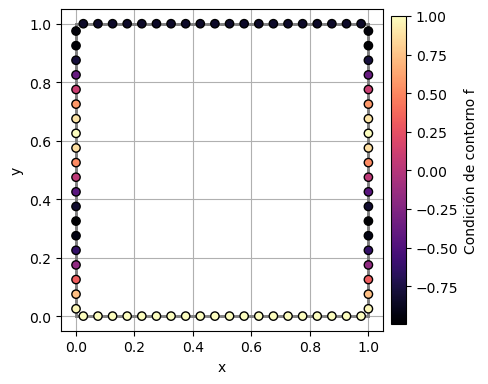

In [32]:
plot_edge_scalar_field(aCenters, aVertex, aElement, f, title="")

In [33]:
interiorPoints = generateInteriorPoints_test_problem_2(Nx=n, Ny=n, length=1)

# Potencial incidente en los puntos interiores (inicialmente cero)
interiorIncidentPhi = np.zeros(interiorPoints.shape[0], dtype=complex)
c, density = None,None
v, phi = solveInteriorBoundary(k, alpha, beta, f, phi, v, aVertex, aElement, c, density, 'interior')

interiorPhi = solveInterior(k, v, phi, interiorIncidentPhi, interiorPoints, aVertex, aElement, 'interior')

exact_sol = np.cos(k * interiorPoints[:, 1])

num_sol = interiorPhi.real

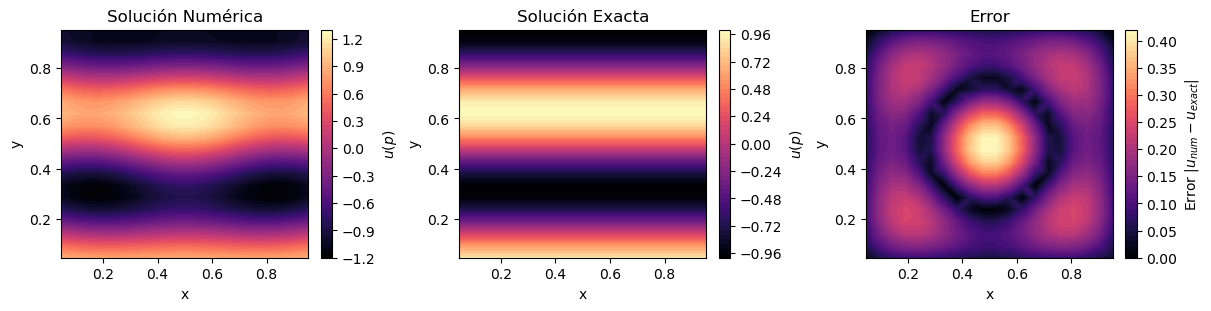

In [34]:
plot_solutions(exact_sol, num_sol, interiorPoints)